In [1]:
import numpy as np

In [6]:
X = np.array([[18],[23],[28],[33],[38],[43],[48],[52],[58],[63]])

In [7]:
X

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [52],
       [58],
       [63]])

In [4]:
Y = np.array([[871],[1132],[1042],[1356],[1488],[1638],[1569],[1754],[1866],[1900]])

In [9]:
Y

array([[ 871],
       [1132],
       [1042],
       [1356],
       [1488],
       [1638],
       [1569],
       [1754],
       [1866],
       [1900]])

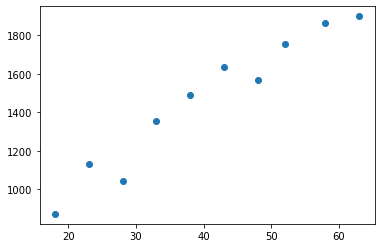

In [8]:
import matplotlib.pyplot as pltb
plt.scatter(X,Y)

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression()

In [13]:
#b
regressor.intercept_

array([538.45682889])

In [14]:
#a
regressor.coef_

array([[22.85007849]])

In [15]:
previsoes = regressor.predict(X)
previsoes

array([[ 949.75824176],
       [1064.00863422],
       [1178.25902669],
       [1292.50941915],
       [1406.75981162],
       [1521.01020408],
       [1635.26059655],
       [1726.66091052],
       [1863.76138148],
       [1978.01177394]])

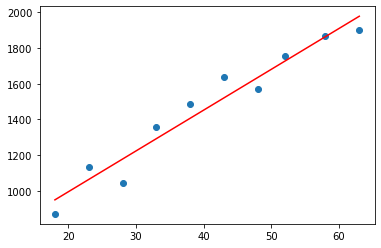

In [20]:
plt.plot(X,Y,'o')
plt.plot(X,previsoes,'red')

In [21]:
np.random.seed(0)
np.random.rand(2)

array([0.5488135 , 0.71518937])

In [41]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [43]:
scaler_y = StandardScaler()
Y = scaler_y.fit_transform(Y)

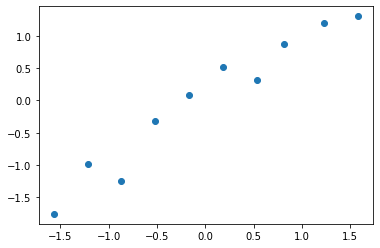

In [44]:
plt.plot(X,Y,'o')

In [23]:
import tensorflow as tf

In [24]:
b0=tf.Variable(0.54)
b1=tf.Variable(0.71)

In [46]:
erro = tf.losses.mean_squared_error(Y,(b0 + b1 * X))
otimizador = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
treinamento = otimizador.minimize(erro)
init = tf.global_variables_initializer()

In [48]:
with tf.Session() as sess:
    sess.run(init)
    #print(sess.run(b0))
    #print(sess.run(b1))
    for i in range(1000):
        sess.run(treinamento)  
    b0_f , b1_f = sess.run([b0,b1])    

In [61]:
previsao1= b0_f + b1_f * X
print(previsao1)

[[-1.39494458]
 [-1.0672929 ]
 [-0.73964122]
 [-0.41198953]
 [-0.08433785]
 [ 0.24331384]
 [ 0.57096552]
 [ 0.83308687]
 [ 1.22626889]
 [ 1.55392058]]


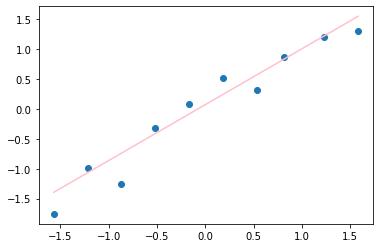

In [52]:
plt.plot(X,Y,'o')
plt.plot(X,(b0_f + b1_f * X),'pink')

In [62]:
previsao1 = scaler_y.inverse_transform(previsao1)
print(previsao1)

[[ 992.84041744]
 [1102.94505431]
 [1213.04969118]
 [1323.15432805]
 [1433.25896492]
 [1543.36360178]
 [1653.46823865]
 [1741.55194815]
 [1873.67751239]
 [1983.78214926]]
